# 乱数

- 線形合同法による一様乱数生成
- ボックス・ミュラー法による正規分布乱数生成

In [ ]:
# display graph on notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [35]:
# 線形合同法による一様乱数生成
class LCGRandom:
    def __init__(self, a, c, max, seed):
        self.a = a
        self.c = c
        self.max = max
        self.x = seed

    def get_int(self):
        self.x = (self.a * self.x + self.c) % self.max
        return self.x
    
    def get(self):
        self.x = (self.a * self.x + self.c) % self.max
        return self.x * 1.0 / max

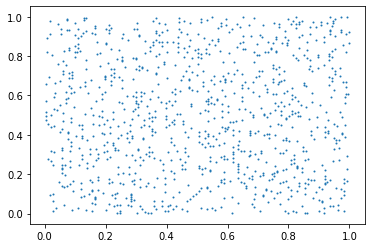

In [36]:
a = 109
c = 1021
max = 32768
seed = 13

lcg = LCGRandom(a, c, max, seed)
result_x = []
result_y = []
for i in range(1000):
    result_x.append(lcg.get())
    result_y.append(lcg.get())

plt.scatter(result_x, result_y, s=1)

In [33]:
# カイ2乗検定で、10に区切った区間に一様分布するかどうか調べる
# この場合、カイ2乗 < 21.7 であれば危険域0.01で一様分布しているとみなせる
num_split = 10
num_try = 100000   # 乱数生成回数
f = [0] * num_split   # 各区間の発生頻度
f_exp = num_try / num_split   # fの期待値
for i in range(num_try):
    f[int(lcg.get() * num_split)] += 1

xi2 = 0
for i in range(num_split):
    xi2 += (f[i] - f_exp) * (f[i] - f_exp) / f_exp

xi2

0.2356

In [82]:
# ボックス・ミュラー法による正規分布乱数生成
class BoxMullerRandom:
    def __init__(self, mean, sigma):
        self.mean = mean
        self.sigma = sigma
        self.rand = LCGRandom(a=109, c=1021, max=32768, seed=13)
    
    def get(self):
        r1 = self.rand.get()
        r2 = self.rand.get()
        if r1 > 0:
            ret1 = self.sigma * np.sqrt(-2 * np.log(r1)) * np.cos(2 * np.pi * r2) + self.mean
            ret2 = self.sigma * np.sqrt(-2 * np.log(r1)) * np.sin(2 * np.pi * r2) + self.mean
            return(ret1, ret2)
        else:
            # r1がゼロの場合はlog0になって警告が出るのでやり直す
            return self.get()

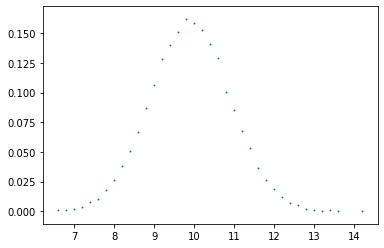

In [86]:
mean = 10
sigma = 1
bm = BoxMullerRandom(mean, sigma)

num_try = 10000
graph_min = 5
graph_max = 15
w = 0.2   # 区間の刻み幅

dist = {}
def func(r):
    if graph_min < r and r < graph_max:
        key =  int(r / w) * w
        if key in dist:
            dist[key] += 1
        else:
            dist[key] = 1
for i in range(num_try):
    r1, r2 = bm.get()
    func(r1)
    func(r2)

result = sorted(dist.items(), key=lambda x:x[0])
result_x = [xy[0] for xy in result]
result_y = [xy[1] * 1.0 / num_try for xy in result]
plt.scatter(result_x, result_y, s=1)